In [7]:
import importlib

import seaborn as sns
import sklearn

from sentiment_analyzer import *
%load_ext autoreload
%autoreload 2
plt.style.use('ggplot')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Read Data ##

In [40]:
aapl_news = pd.read_csv('input/source_1/AppleNewsStock.csv')

msft_news = pd.read_csv('input/source_1/MicrosoftNewsStock.csv')
msft_news.drop(
    msft_news.columns[
        msft_news.columns.str.contains(
    'unnamed', case=False)],
    axis=1, inplace=True)

<Axes: xlabel='Date'>

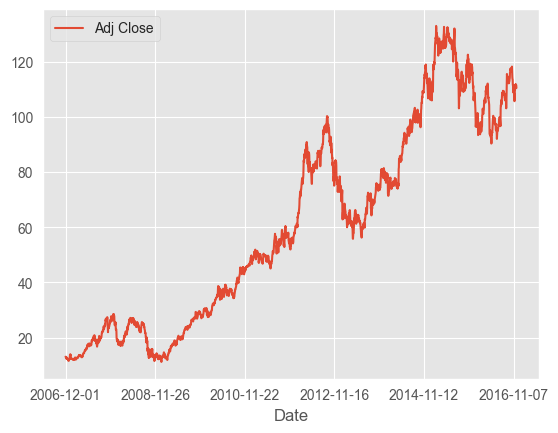

In [4]:
aapl_news.plot.line(y="Adj Close", x='Date')

<Axes: xlabel='Date'>

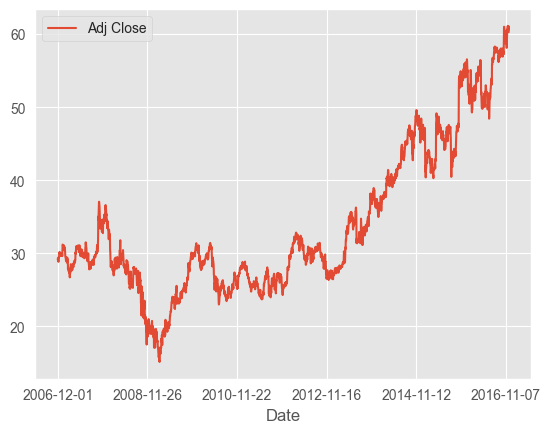

In [5]:
msft_news.plot.line(y="Adj Close", x='Date')

In [41]:
aapl_news["Tomorrow"] = aapl_news["Adj Close"].shift(-1)
aapl_news["Target"] = (aapl_news["Tomorrow"] / aapl_news["Adj Close"]-1)

msft_news["Tomorrow"] = msft_news["Adj Close"].shift(-1)
msft_news["Target"] = (msft_news["Tomorrow"] / msft_news["Adj Close"]-1)

## Sentiment Analysis ##

In [47]:
msft_result = get_results(msft_news,'News')

  0%|          | 0/2517 [00:00<?, ?it/s]

In [49]:
msft_result = get_results_with_pipe(msft_result,'News')

  0%|          | 0/2517 [00:00<?, ?it/s]

In [50]:
msft_result

,Date,Open,High,Low,Close,Adj Close,Volume,News,Tomorrow,Target,sentiment score,pipe sentiment score
0,2006-12-01,29.230000,29.299999,28.900000,29.120001,29.120001,72257000,NaN,29.330000,0.007212,0.000000,0.000000
1,2006-12-04,29.230000,29.520000,29.170000,29.330000,29.330000,55123400,The Retooling of a Search Engine : Ask.com is ...,29.129999,-0.006819,0.000000,0.000000
2,2006-12-05,29.360001,29.400000,29.030001,29.129999,29.129999,45606000,NaN,28.990000,-0.004806,0.000000,0.000000
3,2006-12-06,29.100000,29.129999,28.870001,28.990000,28.990000,48564100,Combat as Usual? Not With These Games : A few ...,28.850000,-0.004829,0.000000,0.000000
4,2006-12-07,28.959999,29.070000,28.809999,28.850000,28.850000,46831100,Vista Is Ready. Are You? : Why it might be a b...,29.400000,0.019064,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2512,2016-11-23,61.009998,61.099998,60.250000,60.400002,60.400002,21848900,"Donald Trump, Nikki Haley, Delhi: Your Thursda...",60.529999,0.002152,0.999217,0.999217
2513,2016-11-25,60.299999,60.529999,60.130001,60.529999,60.529999,8409600,NaN,60.610001,0.001322,0.000000,0.000000
2514,2016-11-28,60.340000,61.020000,60.209999,60.610001,60.610001,20732600,NaN,61.090000,0.007919,0.000000,0.000000
2515,2016-11-29,60.650002,61.410000,60.520000,61.090000,61.090000,22366700,NaN,60.259998,-0.013587,0.000000,0.000000


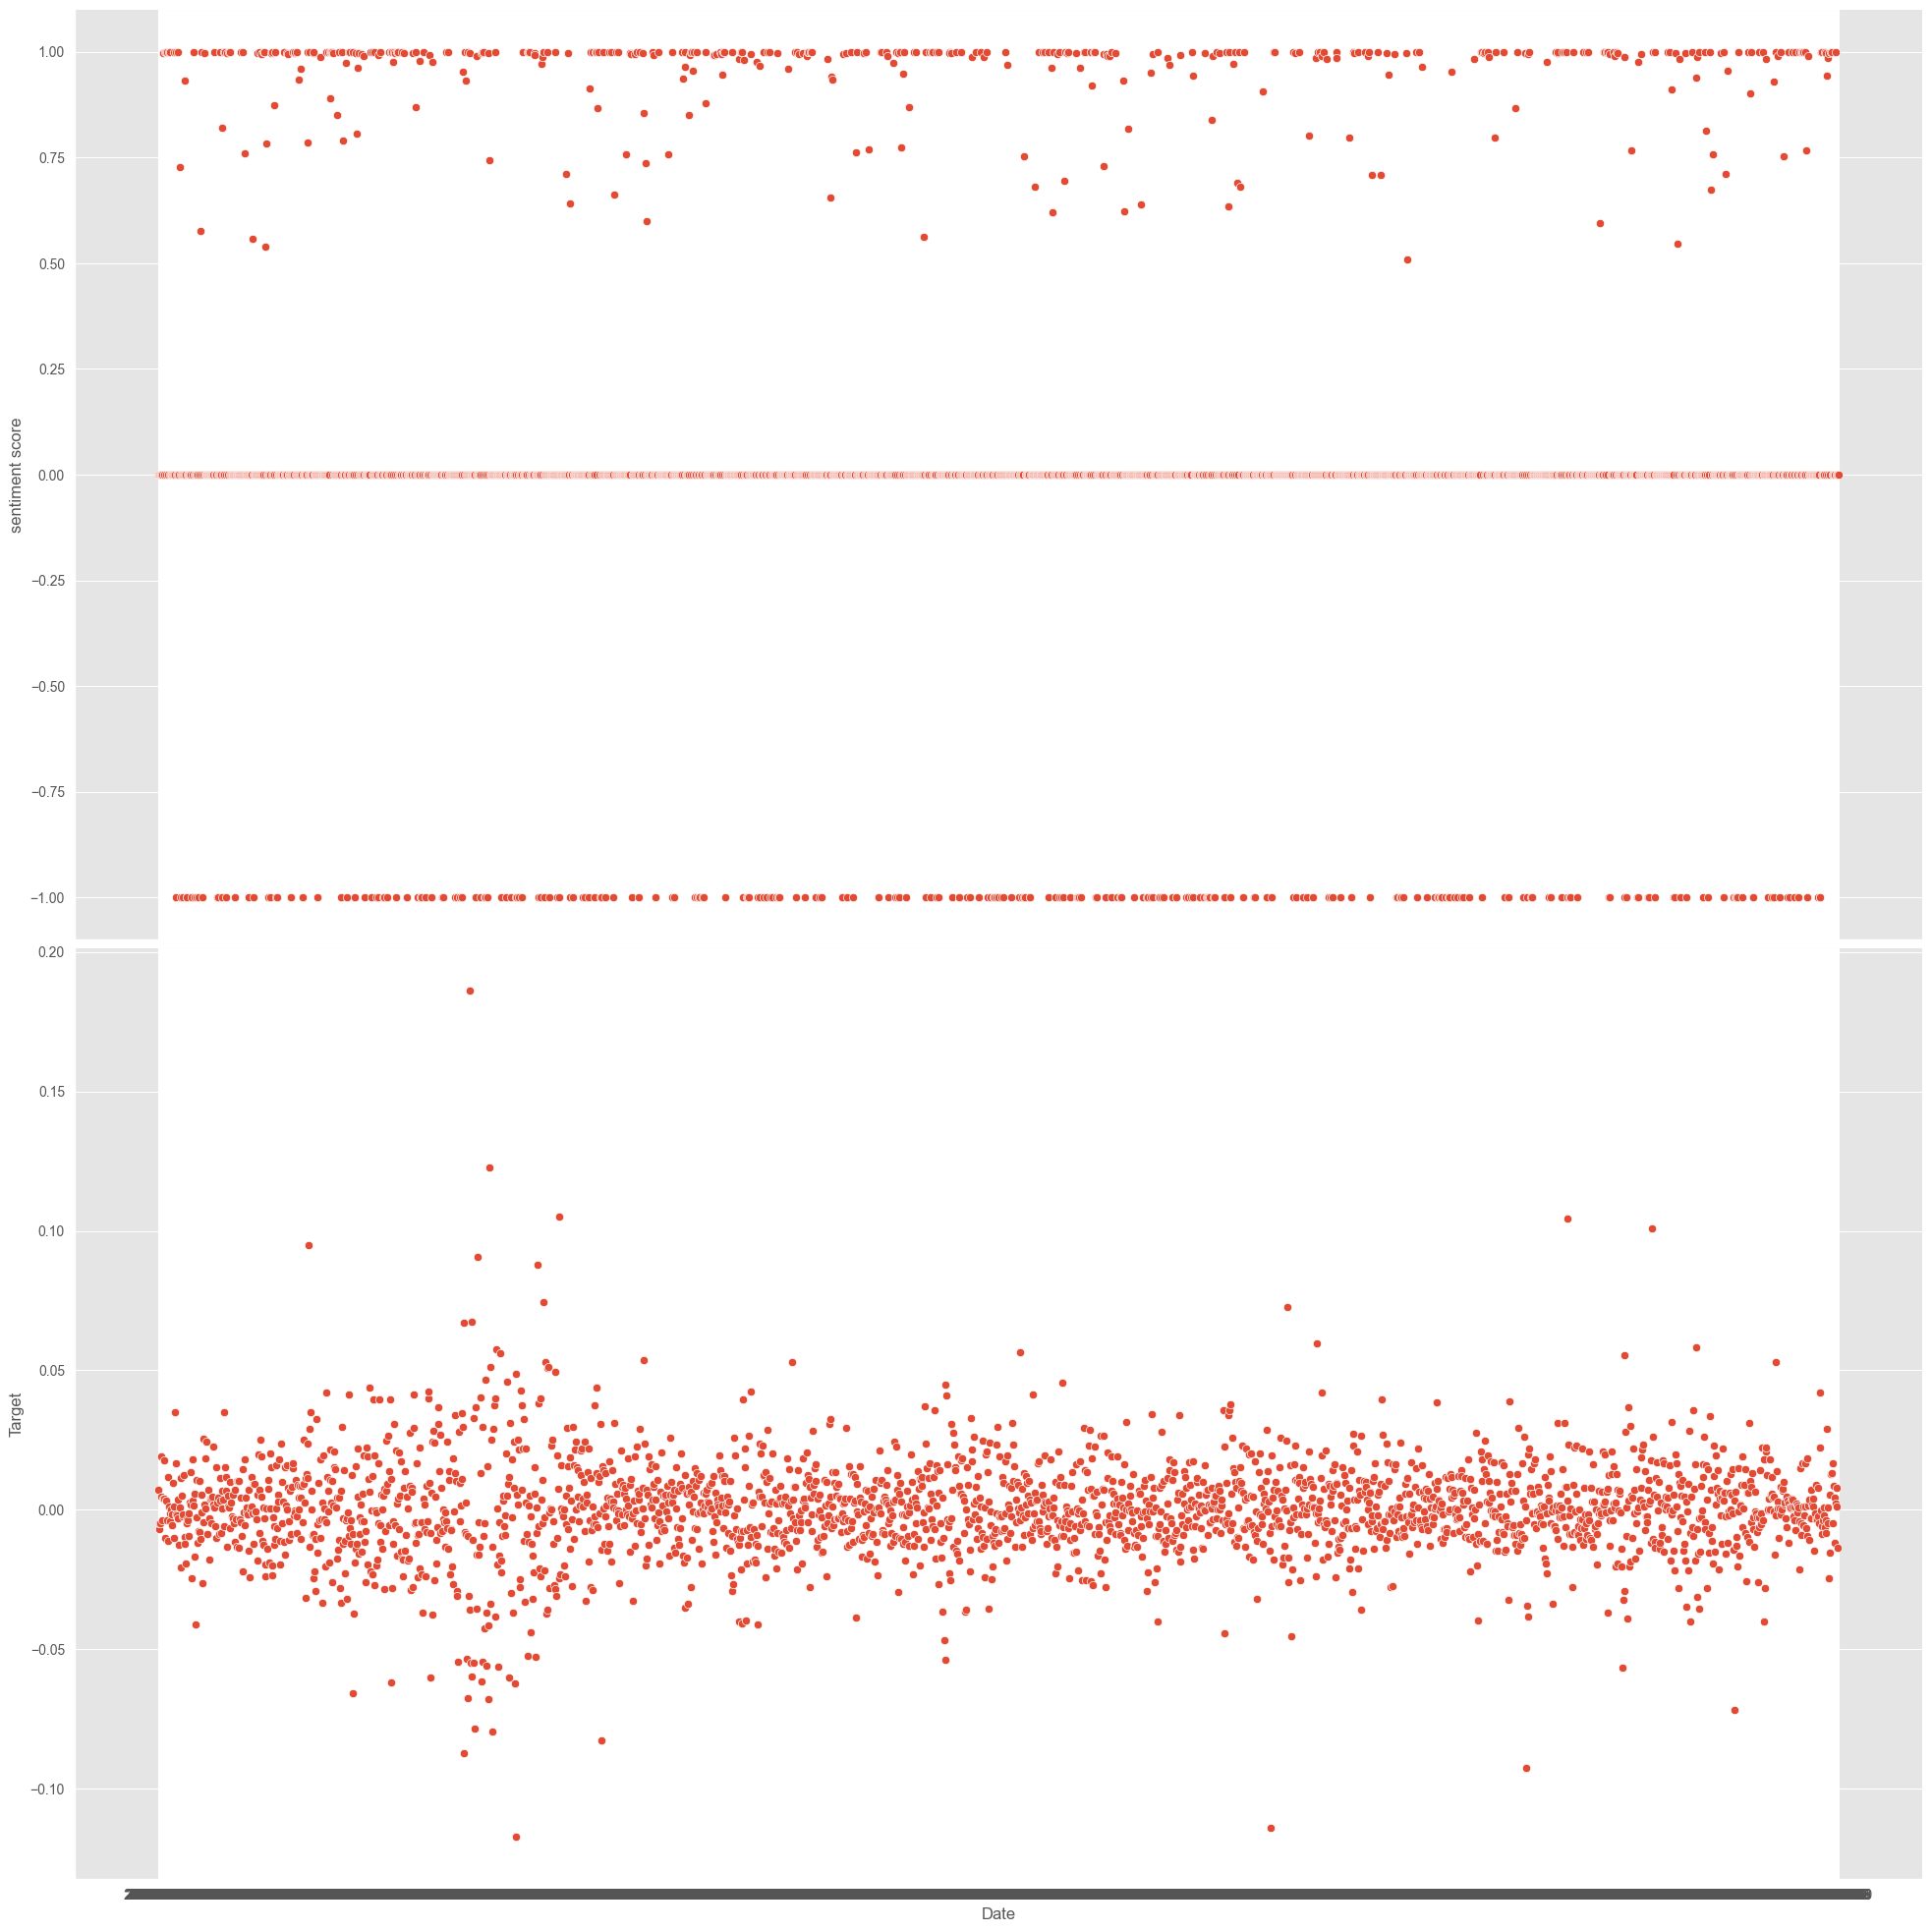

In [55]:
sns.pairplot(data=msft_result,x_vars='Date',y_vars=['sentiment score','Target'],height=10,aspect=2)

In [102]:
msft_check_prediction = check_prediction(msft_result,'Target','sentiment score')

  0%|          | 0/2517 [00:00<?, ?it/s]

In [103]:
msft_check_prediction

,Date,Open,High,Low,Close,Adj Close,Volume,News,Tomorrow,Target,sentiment score,pipe sentiment score,predictions
0,2006-12-01,29.230000,29.299999,28.900000,29.120001,29.120001,72257000,NaN,29.330000,0.007212,0.000000,0.000000,0
1,2006-12-04,29.230000,29.520000,29.170000,29.330000,29.330000,55123400,The Retooling of a Search Engine : Ask.com is ...,29.129999,-0.006819,0.000000,0.000000,0
2,2006-12-05,29.360001,29.400000,29.030001,29.129999,29.129999,45606000,NaN,28.990000,-0.004806,0.000000,0.000000,1
3,2006-12-06,29.100000,29.129999,28.870001,28.990000,28.990000,48564100,Combat as Usual? Not With These Games : A few ...,28.850000,-0.004829,0.000000,0.000000,1
4,2006-12-07,28.959999,29.070000,28.809999,28.850000,28.850000,46831100,Vista Is Ready. Are You? : Why it might be a b...,29.400000,0.019064,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,2016-11-23,61.009998,61.099998,60.250000,60.400002,60.400002,21848900,"Donald Trump, Nikki Haley, Delhi: Your Thursda...",60.529999,0.002152,0.999217,0.999217,1
2513,2016-11-25,60.299999,60.529999,60.130001,60.529999,60.529999,8409600,NaN,60.610001,0.001322,0.000000,0.000000,1
2514,2016-11-28,60.340000,61.020000,60.209999,60.610001,60.610001,20732600,NaN,61.090000,0.007919,0.000000,0.000000,1
2515,2016-11-29,60.650002,61.410000,60.520000,61.090000,61.090000,22366700,NaN,60.259998,-0.013587,0.000000,0.000000,0


In [104]:
aapl_prediction_accuracy = (sum((msft_check_prediction['predictions']))/len(msft_check_prediction.index))

In [105]:
aapl_prediction_accuracy

0.4696066746126341

In [219]:
aapl_result_with_pipe = get_results_with_pipe(aapl_news,'Target')
aapl_result_with_pipe

  0%|          | 0/2517 [00:00<?, ?it/s]

,label,score
0,neutral,0.999839
1,neutral,0.999857
2,neutral,1.000000
3,neutral,0.966118
4,negative,0.998693
...,...,...
2512,neutral,1.000000
2513,positive,0.628444
2514,neutral,1.000000
2515,neutral,1.000000


In [ ]:
aapl_result, aapl_fail = get_results(aapl_news)

In [185]:
msft_result = pd.DataFrame(msft_result).T
msft_result

,roberta_neg,roberta_neu,roberta_pos
0,0.000000,1.000000,0.000000
1,0.000062,0.999879,0.000059
2,0.000000,1.000000,0.000000
3,0.000066,0.999801,0.000134
4,0.000089,0.999631,0.000279
...,...,...,...
2512,0.000217,0.000566,0.999217
2513,0.000000,1.000000,0.000000
2514,0.000000,1.000000,0.000000
2515,0.000000,1.000000,0.000000


In [ ]:
aapl_result = pd.DataFrame(aapl_result).T
aapl_result

In [268]:
## aapl_tes = aapl_result.reset_index().rename(columns={'index': 'index'})
aapl_test= pd.merge(aapl_news, aapl_result, 
                    left_index=True, right_index=True)
aapl_test

,Date,Open,High,Low,Close,Adj Close,Volume,News,Tomorrow,Target,roberta_neg,roberta_neu,roberta_pos
0,2006-12-01,13.114285,13.190000,12.871428,91.320000,13.045714,198769900,WHAT'S ON TONIGHT : 8 P.M. (TLC) ASHLEY JUDD A...,13.017143,0,0.000111,0.999839,0.000050
1,2006-12-04,13.125714,13.150000,12.928572,91.120003,13.017143,177384200,More on Housing Prices : The broadest governme...,13.038571,1,0.000058,0.999857,0.000086
2,2006-12-05,13.092857,13.190000,12.981428,91.269997,13.038571,165709600,NaN,12.832857,0,0.000000,1.000000,0.000000
3,2006-12-06,12.948571,13.055715,12.810000,89.830002,12.832857,159546100,Honoring R.W. Apple in Words and Food : About ...,12.434286,0,0.033288,0.966118,0.000594
4,2006-12-07,12.861428,12.928572,12.414286,87.040001,12.434286,251206900,"Homebuilders, and Worries Over Jobs, Lead a De...",12.608571,1,0.998693,0.000705,0.000603
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,2016-11-23,111.360001,111.510002,110.330002,111.230003,111.230003,27426400,NaN,111.790001,1,0.000000,1.000000,0.000000
2513,2016-11-25,111.129997,111.870003,110.949997,111.790001,111.790001,11475900,Fighting iOS Calendar Spam : Unsolicited invit...,111.570000,0,0.369550,0.002006,0.628444
2514,2016-11-28,111.430000,112.470001,111.389999,111.570000,111.570000,27194000,NaN,111.459999,0,0.000000,1.000000,0.000000
2515,2016-11-29,110.779999,112.029999,110.070000,111.459999,111.459999,28528800,NaN,110.519997,0,0.000000,1.000000,0.000000


In [270]:
aapl_prediction_check, prediction_check_fail = check_prediction(aapl_test)

  0%|          | 0/2517 [00:00<?, ?it/s]

In [271]:
aapl_prediction_check = (
    pd.DataFrame.from_dict(aapl_prediction_check,orient='index'))

In [272]:
aapl_prediction_check.columns = ['prediction check']
aapl_prediction_check

,prediction check
0,0
1,0
2,0
3,1
4,0
...,...
2512,0
2513,0
2514,1
2515,1


In [273]:
aapl_prediction_accuracy = (sum(aapl_prediction_check['prediction check'])
 /len(aapl_prediction_check.index))
aapl_prediction_accuracy

0.5053635280095352

In [237]:
aapl_pipe_prediction_check, pipe_prediction_check_fail = check_pipe_prediction(aapl_test)

  0%|          | 0/2517 [00:00<?, ?it/s]

{0: 0,
 1: 0,
 2: 0,
 3: 1,
 4: 0,
 5: 0,
 6: 1,
 7: 0,
 8: 0,
 9: 1,
 10: 1,
 11: 0,
 12: 0,
 13: 1,
 14: 1,
 15: 1,
 16: 0,
 17: 1,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 1,
 24: 1,
 25: 0,
 26: 1,
 27: 1,
 28: 0,
 29: 0,
 30: 0,
 31: 1,
 32: 0,
 33: 0,
 34: 0,
 35: 0,
 36: 0,
 37: 1,
 38: 1,
 39: 0,
 40: 0,
 41: 0,
 42: 0,
 43: 1,
 44: 1,
 45: 1,
 46: 0,
 47: 0,
 48: 0,
 49: 0,
 50: 1,
 51: 0,
 52: 1,
 53: 1,
 54: 0,
 55: 0,
 56: 1,
 57: 0,
 58: 1,
 59: 1,
 60: 0,
 61: 1,
 62: 0,
 63: 0,
 64: 0,
 65: 0,
 66: 1,
 67: 0,
 68: 0,
 69: 0,
 70: 1,
 71: 1,
 72: 1,
 73: 1,
 74: 0,
 75: 0,
 76: 0,
 77: 1,
 78: 0,
 79: 0,
 80: 0,
 81: 0,
 82: 0,
 83: 0,
 84: 0,
 85: 1,
 86: 0,
 87: 1,
 88: 1,
 89: 0,
 90: 0,
 91: 0,
 92: 1,
 93: 0,
 94: 1,
 95: 1,
 96: 0,
 97: 1,
 98: 1,
 99: 0,
 100: 1,
 101: 1,
 102: 1,
 103: 1,
 104: 1,
 105: 1,
 106: 1,
 107: 1,
 108: 1,
 109: 1,
 110: 0,
 111: 1,
 112: 1,
 113: 1,
 114: 1,
 115: 1,
 116: 0,
 117: 1,
 118: 0,
 119: 1,
 120: 1,
 121: 0,
 122: 0,
 12

In [243]:
aapl_pipe_prediction_check = (
    pd.DataFrame.from_dict(aapl_pipe_prediction_check,orient='index'))

In [247]:
aapl_pipe_prediction_check.columns = ['prediction check']
aapl_pipe_prediction_check

,prediction check
0,0
1,0
2,0
3,1
4,0
...,...
2512,0
2513,0
2514,1
2515,1


In [249]:
aapl_pipe_prediction_accuracy = (sum(aapl_pipe_prediction_check['prediction check'])
 /len(aapl_pipe_prediction_check.index))
aapl_pipe_prediction_accuracy

0.5053635280095352

In [ ]:
aapl_predictions = pd.DataFrame
aapl_predictions['Predictions']

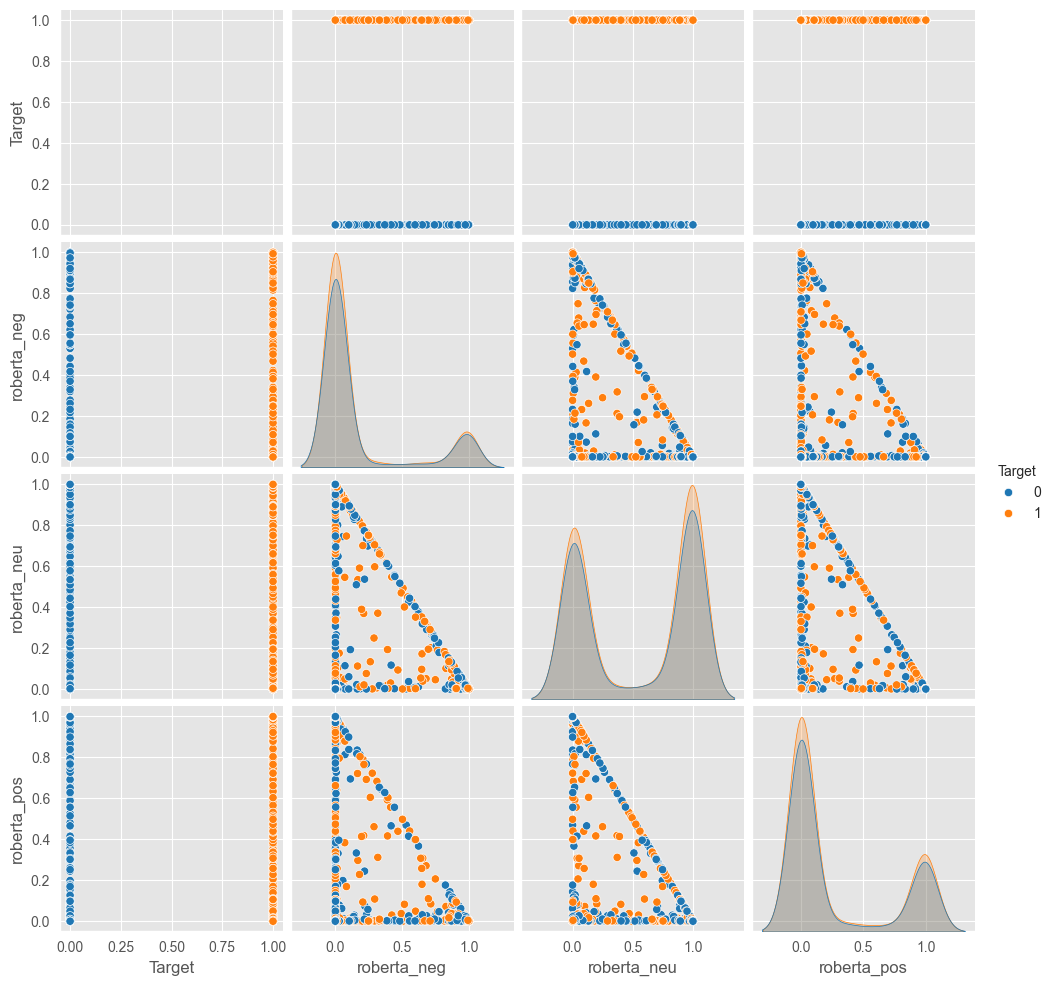

In [197]:
## Combine and Compare ##

sns.pairplot(data=aapl_test,
             vars=['Target','roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue='Target',
             palette='tab10')
plt.show()